**Nama: Cindy Nadila Putri | NIM: 122140002
Kuis 1 Visualisasi Data dan Informasi**

**Deskripsi Dataset**

---

Dataset ini berisi informasi tentang kebiasaan belanja pelanggan, termasuk data pribadi, preferensi belanja, dan interaksi dengan iklan. Data pribadi mencakup usia (angka), jenis kelamin, pendapatan, status pernikahan, pendidikan, pekerjaan, dan lokasi pelanggan (kategori). Kebiasaan belanja terlihat dari jenis produk yang dibeli, jumlah uang yang dikeluarkan (angka), metode pembayaran, serta waktu transaksi (tanggal atau kategori). Selain itu, dataset ini juga mencatat apakah pelanggan sering melihat iklan, menggunakan diskon, atau mengikuti program loyalitas. Ada juga data tentang tingkat kepuasan pelanggan (angka), alasan mereka berbelanja (misalnya kebutuhan atau keinginan), serta preferensi pengiriman. Dataset ini bisa membantu memahami pola belanja dan membuat analisis tren konsumsi.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Dataset 2 - consumer behavior.csv')
print(df.head())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
   Customer_ID  Age  Gender Income_Level Marital_Status Education_Level  \
0  37-611-6911   22  Female       Middle        Married      Bachelor's   
1  29-392-9296   49    Male         High        Married     High School   
2  84-649-5117   24  Female       Middle         Single        Master's   
3  48-980-6078   29  Female       Middle         Single        Master's   
4  91-170-9072   33  Female       Middle        Widowed     High School   

  Occupation  Location     Purchase_Category Purchase_Amount  ...  \
0     Middle      Évry  Gardening & Outdoors        $333.80   ...   
1       High  Huocheng      Food & Beverages        $222.22   ...   
2       High    Huzhen       Office Supplies        $426.22   ...   
3     Middle    Wiwilí       Home Appliances        $101.31   ...   
4     Middle      Nara             Furniture        $211.70   ...   

   Cu

**Pre-processing Data**

---



Jumlah missing values per kolom:
Social_Media_Influence    247
Engagement_with_Ads       256
dtype: int64


Jumlah data yang duplikat: 0




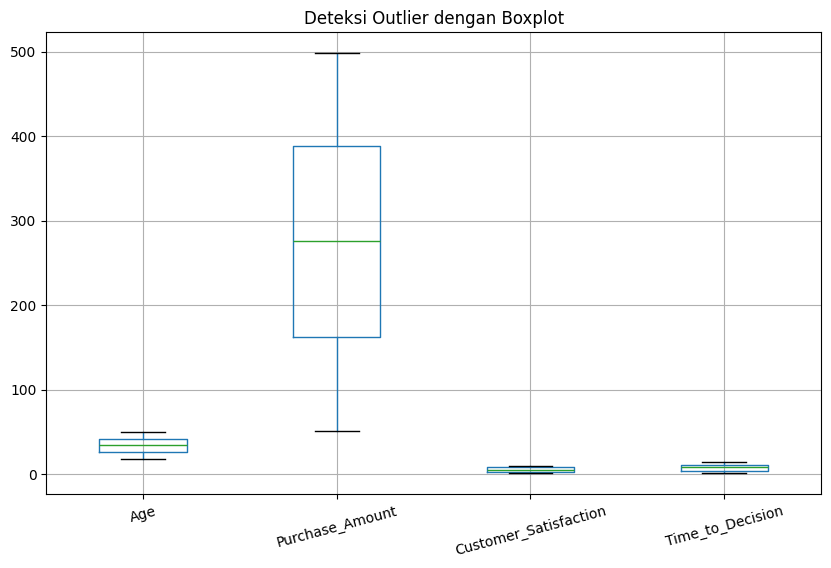

Outlier yang terdeteksi:
Empty DataFrame
Columns: [Customer_ID, Age, Gender, Income_Level, Marital_Status, Education_Level, Occupation, Location, Purchase_Category, Purchase_Amount, Frequency_of_Purchase, Purchase_Channel, Brand_Loyalty, Product_Rating, Time_Spent_on_Product_Research(hours), Social_Media_Influence, Discount_Sensitivity, Return_Rate, Customer_Satisfaction, Engagement_with_Ads, Device_Used_for_Shopping, Payment_Method, Time_of_Purchase, Discount_Used, Customer_Loyalty_Program_Member, Purchase_Intent, Shipping_Preference, Time_to_Decision]
Index: []

[0 rows x 28 columns]


Cek kategori unik di setiap kolom kategorikal:
Gender: ['Female' 'Male' 'Bigender' 'Genderfluid' 'Non-binary' 'Polygender'
 'Agender' 'Genderqueer']
Income_Level: ['Middle' 'High']
Marital_Status: ['Married' 'Single' 'Widowed' 'Divorced']
Education_Level: ["Bachelor's" 'High School' "Master's"]
Occupation: ['Middle' 'High']
Purchase_Category: ['Gardening & Outdoors' 'Food & Beverages' 'Office Supplies'

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore

# Cek Missing Values (Data Kosong)
print("Jumlah missing values per kolom:")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])  # Hanya tampilkan kolom yang memiliki nilai kosong

print("\n" + "="*50 + "\n")

# Cek Data Duplikat
duplicates = df.duplicated().sum()
print(f"Jumlah data yang duplikat: {duplicates}")

print("\n" + "="*50 + "\n")

# Cek Outlier (Nilai Ekstrem)
numerical_cols = ["Age", "Purchase_Amount", "Customer_Satisfaction", "Time_to_Decision"]

# Konversi "Purchase_Amount" ke float karena mungkin masih string dengan simbol $
df["Purchase_Amount"] = df["Purchase_Amount"].replace('[\$,]', '', regex=True).astype(float)

# Visualisasi outlier dengan boxplot
plt.figure(figsize=(10, 6))
df[numerical_cols].boxplot()
plt.xticks(rotation=15)
plt.title("Deteksi Outlier dengan Boxplot")
plt.show()

# Deteksi outlier menggunakan z-score
z_scores = df[numerical_cols].apply(zscore)
outliers = (z_scores > 3) | (z_scores < -3)
print("Outlier yang terdeteksi:")
print(df[outliers.any(axis=1)])

print("\n" + "="*50 + "\n")

# Cek Noise dalam Data Kategorikal
categorical_cols = ["Gender", "Income_Level", "Marital_Status", "Education_Level", "Occupation",
                    "Purchase_Category", "Engagement_with_Ads", "Device_Used_for_Shopping", "Payment_Method"]

print("Cek kategori unik di setiap kolom kategorikal:")
for col in categorical_cols:
    print(f"{col}: {df[col].unique()}")


Dataset ini memiliki beberapa data yang tidak konsisten serta nilai yang hilang. Pada kolom gender, terdapat kategori seperti bigender, genderfluid, dan non-binary yang bisa dikelompokkan menjadi kategori lain agar lebih seragam. Beberapa kategori dalam jenis pembelian juga ditemukan memiliki kesalahan penulisan, seperti adanya tanda kurung yang tidak sesuai. Selain itu, terdapat 247 data yang kosong pada kolom pengaruh media sosial dan 256 data kosong pada kolom keterlibatan dengan iklan. Data yang hilang ini dapat diatasi dengan mengisi nilai yang sesuai atau menggantinya dengan kategori tertentu agar tetap dapat digunakan dalam analisis.

In [ ]:
# Handling Missing Values dengan Aggregation (menggunakan modus)
# Mengisi missing values dengan nilai yang paling sering muncul di kolom tersebut
df["Social_Media_Influence"].fillna(df["Social_Media_Influence"].mode()[0], inplace=True)
df["Engagement_with_Ads"].fillna(df["Engagement_with_Ads"].mode()[0], inplace=True)

# Handling Missing Values dengan Variable Transformation (menggunakan kategori "Unknown")
# Jika ingin mengganti missing values dengan "Unknown" sebagai kategori baru
df["Social_Media_Influence"].fillna("Unknown", inplace=True)
df["Engagement_with_Ads"].fillna("Unknown", inplace=True)

# Cek ulang apakah masih ada missing values
print("Jumlah missing values setelah perbaikan:")
print(df.isnull().sum())


Jumlah missing values setelah perbaikan:
Customer_ID                              0
Age                                      0
Gender                                   0
Income_Level                             0
Marital_Status                           0
Education_Level                          0
Occupation                               0
Location                                 0
Purchase_Category                        0
Purchase_Amount                          0
Frequency_of_Purchase                    0
Purchase_Channel                         0
Brand_Loyalty                            0
Product_Rating                           0
Time_Spent_on_Product_Research(hours)    0
Social_Media_Influence                   0
Discount_Sensitivity                     0
Return_Rate                              0
Customer_Satisfaction                    0
Engagement_with_Ads                      0
Device_Used_for_Shopping                 0
Payment_Method                           0
Time_of_Purch

<ipython-input-9-db482712cc15>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Social_Media_Influence"].fillna(df["Social_Media_Influence"].mode()[0], inplace=True)
<ipython-input-9-db482712cc15>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col]

In [ ]:
# Variable Transformation: Standarisasi kategori yang tidak konsisten
df["Gender"] = df["Gender"].replace({
    "Bigender": "Other", "Genderfluid": "Other", "Non-binary": "Other",
    "Polygender": "Other", "Agender": "Other", "Genderqueer": "Other"
})

df["Purchase_Category"] = df["Purchase_Category"].replace({
    "Packages)": "Packages",
    "Travel & Leisure (Flights": "Travel & Leisure"
})

# Variable Transformation: Mengubah format kategori agar konsisten
df["Income_Level"] = df["Income_Level"].str.capitalize()  # Pastikan huruf awal kapital
df["Engagement_with_Ads"] = df["Engagement_with_Ads"].str.capitalize()

# Cek ulang kategori unik setelah perbaikan
categorical_cols = ["Gender", "Purchase_Category", "Income_Level", "Engagement_with_Ads"]
for col in categorical_cols:
    print(f"{col}: {df[col].unique()}")


Gender: ['Female' 'Male' 'Other']
Purchase_Category: ['Gardening & Outdoors' 'Food & Beverages' 'Office Supplies'
 'Home Appliances' 'Furniture' 'Books' 'Sports & Outdoors'
 'Mobile Accessories' 'Luxury Goods' 'Animal Feed' 'Health Care' 'Hotels'
 'Packages' 'Electronics' 'Software & Apps' 'Baby Products' 'Toys & Games'
 'Arts & Crafts' 'Health Supplements' 'Groceries' 'Clothing'
 'Beauty & Personal Care' 'Travel & Leisure' 'Jewelry & Accessories']
Income_Level: ['Middle' 'High']
Engagement_with_Ads: ['High' 'Low' 'Medium']


**Teknik Pre-Processing**

---
Pada tahap pembersihan data, beberapa metode preprocessing digunakan untuk mengatasi nilai yang hilang dan data yang tidak konsisten.

Pertama, untuk menangani data yang kosong, digunakan dua metode. Aggregation diterapkan dengan mengisi nilai yang hilang menggunakan data yang paling sering muncul dalam kolom tersebut, sehingga pola asli tetap dipertahankan. Selain itu, variable transformation digunakan dengan mengganti nilai kosong menggunakan kategori baru, yaitu "Unknown", agar informasi tetap utuh tanpa mengubah distribusi data secara signifikan.

Kedua, dalam memperbaiki data yang tidak konsisten atau berantakan, diterapkan variable transformation. Pada kolom gender, kategori seperti bigender, genderfluid, dan non-binary dikelompokkan ke dalam satu kategori baru, yaitu "Other", agar lebih mudah dianalisis. Kesalahan penulisan pada kategori jenis pembelian juga diperbaiki, misalnya tulisan yang tidak lengkap atau terdapat tanda kurung yang salah. Selain itu, format teks di beberapa kolom, seperti tingkat pendapatan dan keterlibatan dengan iklan, diseragamkan dengan memastikan huruf awal menggunakan huruf kapital agar lebih rapi dan mudah dibaca.


**Visualisasi Data**

---



<Figure size 1200x600 with 0 Axes>

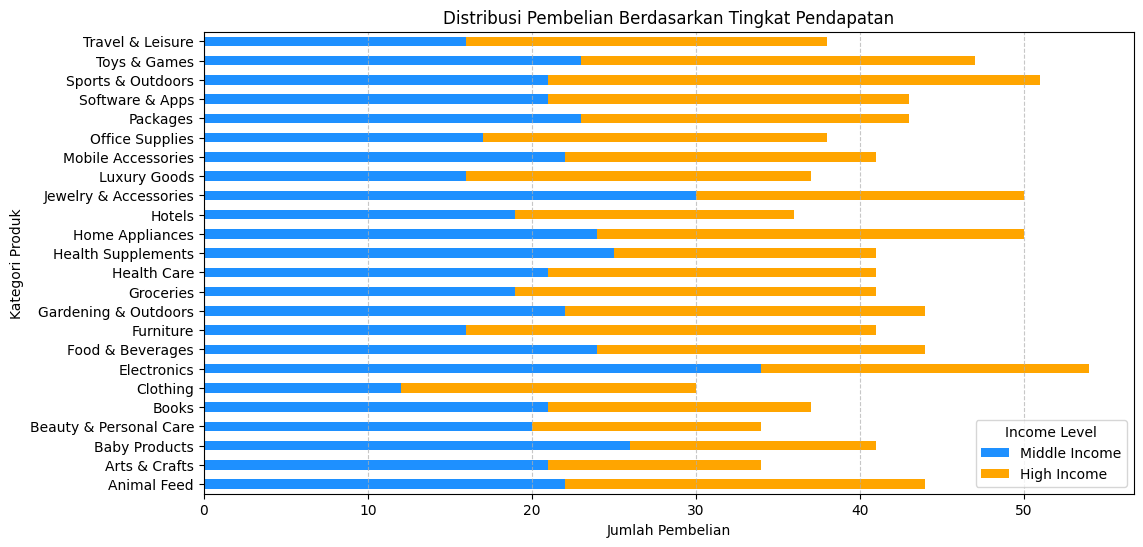

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Horizontal Stacked Bar Chart: Tingkat Pendapatan vs Kategori Produk
plt.figure(figsize=(12, 6))
income_product = df.groupby(["Purchase_Category", "Income_Level"]).size().unstack()
income_product.plot(kind='barh', stacked=True, color=["#1E90FF", "#FFA500"], figsize=(12, 6))
plt.xlabel("Jumlah Pembelian")
plt.ylabel("Kategori Produk")
plt.title("Distribusi Pembelian Berdasarkan Tingkat Pendapatan")
plt.legend(title="Income Level", labels=["Middle Income", "High Income"])
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

**Analisis Horizontal Stacked Bar Chart (Tingkat Pendapatan vs Kategori Produk)**

---
Visualisasi ini menggunakan horizontal stacked bar chart karena lebih efektif dalam menampilkan distribusi tingkat pendapatan dalam setiap kategori produk. Format horizontal dipilih agar nama kategori produk lebih mudah dibaca dibandingkan format vertikal, terutama jika jumlah kategori cukup banyak.

Untuk warna, digunakan biru (#1E90FF) untuk Middle Income dan oranye (#FFA500) untuk High Income. Pemilihan warna ini bertujuan agar perbedaan kontribusi masing-masing kelompok pendapatan terlihat jelas tanpa membuat visual terlalu mencolok atau membingungkan. Biru dipilih karena melambangkan stabilitas dan umum digunakan untuk data yang lebih moderat, sementara oranye melambangkan eksklusivitas dan energi, yang sesuai dengan segmen pendapatan lebih tinggi.

Dari hasil visualisasi ini, kita bisa melihat pola pembelian berdasarkan tingkat pendapatan. Jika suatu kategori didominasi oleh kelompok High Income, berarti produk tersebut lebih menarik bagi pelanggan dengan penghasilan tinggi. Sebaliknya, jika proporsi Middle Income lebih besar, maka kategori tersebut lebih banyak dibeli oleh pelanggan dengan penghasilan menengah. Analisis ini bisa membantu dalam menentukan strategi pemasaran atau segmentasi produk yang lebih efektif.




<Figure size 1200x600 with 0 Axes>

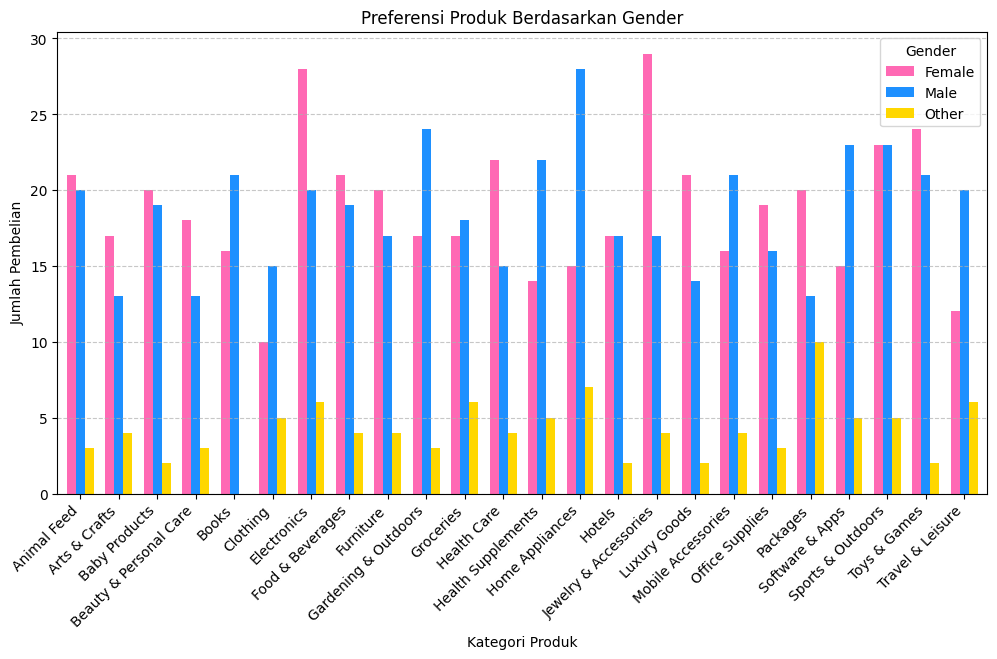

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Grouped Bar Chart: Gender vs Preferensi Produk
plt.figure(figsize=(12, 6))
gender_product = df.groupby(["Purchase_Category", "Gender"]).size().unstack()
gender_product.plot(kind='bar', figsize=(12, 6), color=["#FF69B4", "#1E90FF", "#FFD700"], width=0.7)
plt.xlabel("Kategori Produk")
plt.ylabel("Jumlah Pembelian")
plt.title("Preferensi Produk Berdasarkan Gender")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Gender", labels=["Female", "Male", "Other"])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Analisis Grouped Bar Chart (Gender vs Preferensi Produk)**

---
Untuk membandingkan preferensi produk berdasarkan gender, digunakan grouped bar chart. Visualisasi ini lebih cocok dibandingkan stacked bar chart karena memungkinkan kita untuk melihat jumlah pembelian setiap gender dalam satu kategori produk tanpa tumpang tindih. Dengan cara ini, perbandingan antar-gender menjadi lebih jelas dan mudah dianalisis.

Warna yang digunakan adalah:

*   Pink (#FF69B4) untuk Female – Warna ini dipilih karena sering diasosiasikan dengan feminin dan mudah dikenali.
*   Biru (#1E90FF) untuk Male – Biru melambangkan stabilitas dan sering dikaitkan dengan warna maskulin.
*   Kuning (#FFD700) untuk Other – Kuning dipilih karena netral dan tetap mencolok, sehingga gender lain juga mendapatkan representasi yang jelas dalam visualisasi.

Rotasi label pada sumbu X diterapkan untuk memastikan semua kategori produk bisa terbaca dengan jelas tanpa tumpang tindih. Grid pada sumbu Y juga ditambahkan untuk mempermudah pembacaan jumlah pembelian.

Dari visualisasi ini, kita dapat melihat pola pembelian berdasarkan gender. Jika suatu kategori produk lebih banyak dibeli oleh Female, bisa jadi produk tersebut lebih menarik bagi pelanggan wanita, dan sebaliknya untuk Male. Untuk kategori dengan distribusi yang lebih seimbang, artinya produk tersebut memiliki daya tarik yang luas bagi semua gender.


Referensi Lengkap Code: [122140002 Kuis Visualisasi Data dan Informasi Google Colab](https://colab.research.google.com/drive/187vqkSlx5PW5gNuYKe6w7Thlm0SrbMWM?usp=sharing)